# 퍼셉트론



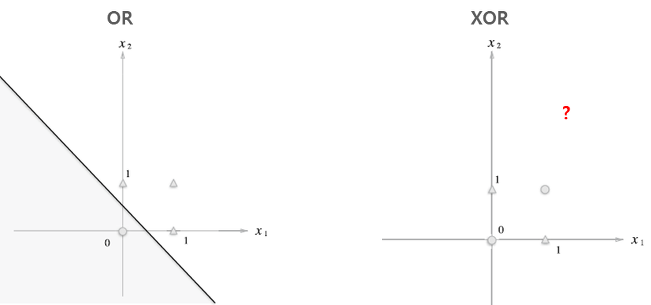

1. 퍼셉트론은 하나의 선만을 그어서는 XOR문제를 해결할 수 없음  (XOR : 둘중 하나만 참일 때 참)

 - 즉 입력레이어에서 출력레이어로 바로 연결해서는 해결이 안됨


2. 이 문제를 해결 하기 위해 다층퍼셉트론이 등장 (Multilayer Perceptron)

3. x1 XOR x2 == NOT(x1 AND x2) AND (x1 OR x2)

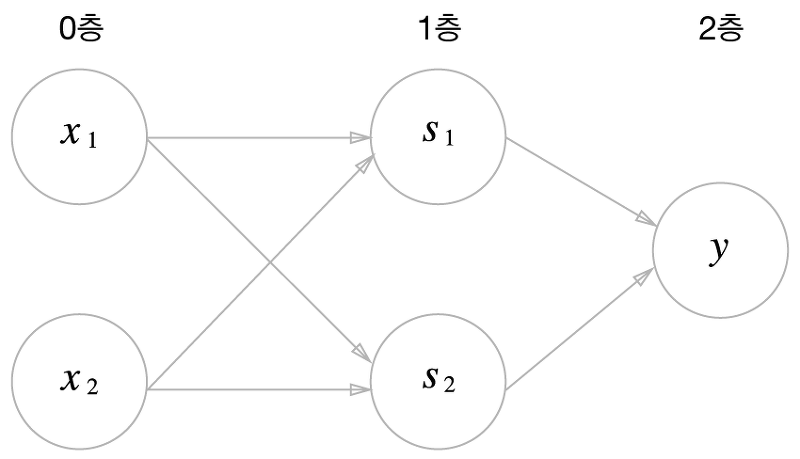

4. 입/출력 레이어 외에 히든레이어를 추가하여 S1은 NAND 연산을, S2는 OR 연산을 담당하고, S1과 S2를 AND 연산

### 단층 퍼셉트론

In [17]:
import tensorflow as tf
import numpy as np

In [18]:
x_data=np.array([[0,0],[0,1],[1,0],[1,1]],dtype=np.float32)
y_data=np.array([[0],[1],[1],[0]])

X=tf.placeholder(tf.float32,[None,2],name='x-input')
Y=tf.placeholder(tf.float32,[None,1],name="y-input")
W=tf.Variable(tf.random_normal([2,1],name='weight'))
b=tf.Variable(tf.random_normal([1],name='bias'))

#활성화 함수 (가설)
hypothesis=tf.sigmoid(tf.matmul(X,W)+b)

#cost
cost=-tf.reduce_mean(Y*tf.log(hypothesis)+(1-Y)*tf.log(1-hypothesis))
train=tf.train.GradientDescentOptimizer(learning_rate=0.1).minimize(cost)

predicted=tf.cast(hypothesis>0.5,dtype=tf.float32)
accuracy=tf.reduce_mean(tf.cast(tf.equal(predicted,Y),dtype=tf.float32))

In [19]:
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    for step in range(10001):
        sess.run(train,feed_dict={X:x_data,Y:y_data})
        
        if step % 100 ==0:
            print("step = ",step, "cost = ",sess.run(cost,feed_dict={X:x_data,Y:y_data}),"W = ",sess.run(W),"b = ",sess.run(b))
            
    h,c,a=sess.run([hypothesis,predicted,accuracy],feed_dict={X:x_data,Y:y_data})
    print("\nhypothesis : ",h ,"\nCorrect : ",c,"\Accuracy : ",a)

step =  0 cost =  0.8364345 W =  [[-1.3559128]
 [ 1.0519638]] b =  [0.88369155]
step =  100 cost =  0.7262835 W =  [[-0.9425226 ]
 [ 0.41231224]] b =  [0.33710927]
step =  200 cost =  0.7037928 W =  [[-0.55127215]
 [ 0.1826502 ]] b =  [0.2200129]
step =  300 cost =  0.6966062 W =  [[-0.32164937]
 [ 0.07205575]] b =  [0.14824271]
step =  400 cost =  0.6943147 W =  [[-0.18959889]
 [ 0.02098054]] b =  [0.10004527]
step =  500 cost =  0.6935616 W =  [[-0.1131916 ]
 [-0.00065687]] b =  [0.06752901]
step =  600 cost =  0.6933023 W =  [[-0.06848864]
 [-0.0083647 ]] b =  [0.04558135]
step =  700 cost =  0.6932083 W =  [[-0.04199798]
 [-0.00987793]] b =  [0.03076649]
step =  800 cost =  0.6931722 W =  [[-0.02608711]
 [-0.00892801]] b =  [0.02076654]
step =  900 cost =  0.6931578 W =  [[-0.01640043]
 [-0.00723375]] b =  [0.01401674]
step =  1000 cost =  0.6931518 W =  [[-0.01042463]
 [-0.00552766]] b =  [0.00946082]
step =  1100 cost =  0.6931492 W =  [[-0.00669164]
 [-0.0040756 ]] b =  [0.00638

step =  9400 cost =  0.6931472 W =  [[-8.8936574e-08]
 [-8.8614144e-08]] b =  [1.18265696e-07]
step =  9500 cost =  0.6931472 W =  [[-8.8936574e-08]
 [-8.8614144e-08]] b =  [1.18265696e-07]
step =  9600 cost =  0.6931472 W =  [[-8.8936574e-08]
 [-8.8614144e-08]] b =  [1.18265696e-07]
step =  9700 cost =  0.6931472 W =  [[-8.8936574e-08]
 [-8.8614144e-08]] b =  [1.18265696e-07]
step =  9800 cost =  0.6931472 W =  [[-8.8936574e-08]
 [-8.8614144e-08]] b =  [1.18265696e-07]
step =  9900 cost =  0.6931472 W =  [[-8.8936574e-08]
 [-8.8614144e-08]] b =  [1.18265696e-07]
step =  10000 cost =  0.6931472 W =  [[-8.8936574e-08]
 [-8.8614144e-08]] b =  [1.18265696e-07]

hypothesis :  [[0.5]
 [0.5]
 [0.5]
 [0.5]] 
Correct :  [[0.]
 [0.]
 [0.]
 [0.]] \Accuracy :  0.5


## 다층 퍼셉트론

In [21]:
w11=np.array([-2,-2])
w12=np.array([2,2])
w2=np.array([1,1])
b1=3
b2=-1
b3=-1

In [25]:
#퍼셉트론
def MLP(x,w,b):
    y=np.sum(w*x)+b
    if y<=0:
        return 0
    else:
        return 1

In [23]:
#NAND 게이트
def NAND(x1,x2):
    return MLP(np.array([x1,x2]),w11,b1)

In [29]:
#OR 게이트
def OR(x1,x2):
    return MLP(np.array([x1,x2]),w12,b2)

In [30]:
#AND 게이트
def AND(x1,x2):
    return MLP(np.array([x1,x2]),w2,b3)

In [31]:
#XOR 게이트
def XOR(x1,x2):
    return AND(NAND(x1,x2),OR(x1,x2))

In [32]:
if __name__=='__main__':
    for x in [(0,0),(1,0),(0,1),(1,1)]:
        y=XOR(x[0],x[1])
        print("입력 값 : " + str(x) + "출력 값:" + str(y))

입력 값 : (0, 0)출력 값:0
입력 값 : (1, 0)출력 값:1
입력 값 : (0, 1)출력 값:1
입력 값 : (1, 1)출력 값:0


In [33]:
w11=np.array([-7.40,-7.40])
w12=np.array([8.67,8.67])
w2=np.array([7.41,7.41])
b1=11.28
b2=--3.87
b3=-11.29

In [34]:
if __name__=='__main__':
    for x in [(0,0),(1,0),(0,1),(1,1)]:
        y=XOR(x[0],x[1])
        print("입력 값 : " + str(x) + "출력 값:" + str(y))

입력 값 : (0, 0)출력 값:1
입력 값 : (1, 0)출력 값:1
입력 값 : (0, 1)출력 값:1
입력 값 : (1, 1)출력 값:0
